## Units - in LBM

### length, time and velocity

We define:

 - $\Delta x$ - how many meters has one lattice unit
 - $\Delta t$ - how many seconds takes one step

which implies that:

$$ \Delta u = \frac{\Delta x}{\Delta t}$$ 

is velocity scaling factor. Note, that it is more common to start with setting $\Delta u$ and $\Delta x$ and use the above formula to get $\Delta t$

Thus we have:

$$ x = \Delta x\cdot x_{lu}$$
$$ t = \Delta t\cdot t_{lu}$$
$$ u = \Delta u\cdot u_{lu}$$




### Density

Usuallly density is more commonly used than the mass in LBM, so:


$$ \Delta \rho = \frac{\rho}{\rho_{lu}}$$

Since usually $\rho_{lu}=1$, $\Delta \rho$ is a density which corresponds to the unit LB density. For clarity we will keep the $\rho_{lu}$ in all formulas.

### Mass

$$ \alpha\; m_{lu} =  m $$
    
then 

$$ \alpha \rho_{lu} (x_{lu})^3 =\alpha m_{lu} =  m = \rho x^3 =  {\rho_{lu}} \frac{\rho}{\rho_{lu}}(\Delta x)^3 x_{lu} $$

thus:

$$ \alpha  =  \Delta \rho \Delta x^3  $$


Finally we get:

$$ m = \Delta \rho  \Delta x^3 m_{lu} $$
$$ m_{lu} = \frac{1}{\Delta \rho}  \frac{1}{\Delta x^3}  m $$





### Force

Let us assume that:
    
$$ \alpha\; F_{lu} =  F $$
    
then 

$$\alpha m_{lu} a_{lu} =\alpha F_{lu} =  F = m a = \Delta\rho\; (\Delta x)^3 m_{lu}\; \frac{\Delta x}{\Delta t^2} a_{lu} $$

thus:

$$ \alpha = \Delta\rho\; \frac{\Delta x^4}{\Delta t^2}  $$



We have:

$$ F_{lu} = \frac{1}{\Delta\rho\;} \frac{\Delta t^2}{\Delta x^4}  F $$
$$ F = \Delta\rho\; \frac{\Delta x^4}{\Delta t^2}  F_{lu}  $$

### Pressure

Let us assume that:

$$ \alpha \; P_{lu}  =  P $$

then
$$ \alpha \; \frac{F_{lu}}{x^2_{lu}}  = \alpha \; P_{lu} = P =  \frac{F}{x^2} = \Delta\rho\; \frac{\Delta x^4}{\Delta t^2}  F_{lu} \frac{ 1 }{\Delta x^2 x_{lu} } $$

thus:

$$ \alpha  =\Delta\rho\; \frac{\Delta x^2}{\Delta t^2}$$

We have:

$$  P = \Delta\rho\;\frac{\Delta x^2}{\Delta t^2} P_{lu}  $$

However in Lattice units we have the equation of state which expresses dependence of density and pressure. For the isothermal model it reads:

$$ P_{lu} = c_s^2 \rho_{lu}$$

then:


$$  P =  c_s^2 \rho_{lu} \; \Delta\rho\; \left(\frac{\Delta x}{\Delta t}\right)^2  $$


### Viscosity

 - $\mu$ - dynamic viscosity
 - $\nu$ - kinematic viscosity

$$ \frac{F}{A} = \mu \frac{u}{x}$$

so 

$$ \mu = \frac{x}{u}\frac{F}{A}$$

$$ \nu = \frac{\mu}{\rho} = \frac{x}{u}\frac{F}{A\rho}$$

let us make an assumption:

$$  \alpha \nu_{lb} = \nu$$ 

thus:

$$  \alpha \nu_{lb} =\alpha \frac{x_{lb}}{u_{lb}}\frac{F_{lb}}{A_{lb}\rho_{lb}} = \frac{x}{u}\frac{F}{A\rho}=\frac{\Delta x x_{lb}}{\frac{\Delta x}{\Delta t}u_{lb}}\frac{\Delta\rho\; \frac{\Delta x^4}{\Delta t^2} F_{lb}}{\Delta x^2 A_{lb}\Delta \rho\rho_{lb}}  $$ 

we get:

$$  \alpha  = \frac{\Delta x^2}{\Delta t}$$



$$  \nu = \frac{\Delta x^2}{\Delta t} \nu_{lb} $$ 
$$  \nu_{lb}= \frac{\Delta t}{\Delta x^2}  \nu$$ 


## Example

Let us imagine 3d Poisseule flow, then we have:


$$ u_{max} = \frac{1}{4\mu}\;\frac{dP}{dx} R^2$$

$$  P =  c_s^2 \rho_{lu} \; \Delta\rho\; \left(\frac{\Delta x}{\Delta t}\right)^2  $$


 - $\mu_{H_20} = 0.89 \cdot 10^{-3} [Pa\cdot s]$
 - $\rho_{H_20} = 1000 [kg/m^3]$
 - $l_0 = 5 \cdot 10^{-3} [m]$
 - $u_{max} = 2 \cdot 10^{-2} [m/s]$
 

One has to be carefull when estimating size of the system. If there are bounce back - no slip - boundaries, the fluid has $ny -(1+2 \alpha)$ space across the system. The parameter $\alpha$ is a location of the boundary, it can be determined from:

```python
     from sailfish.node_type import NTFullBBWall
     NTFullBBWall.location
```
    
    
In this case it is $0.5$.

 
 
 

In [2]:
def calculate_parameters_Poisseule(ny=64, \
        l0 = 5e-3,\
        mu = 0.89e-3,\
        rho = 1000.0,\
        u_max_0 = 2e-2,\
        u_max_lb = 0.1,\
        aspect = 1 ,verbose=False      ):
    nx,nz = aspect*ny,ny
    
    Re  = l0*u_max_0*rho/mu

    Dx = l0/(ny-2)
    Du = u_max_0/u_max_lb
    Dt = Dx/Du
    cs2 = 1.0/3
    Drho = rho # as we simulate with rho_lb=1


    length = (l0*(nx-1))/(ny-2) # note -1 and -2 depending on BC

    dP = 16*mu*length/l0**2*u_max_0
    delta_rho_lu = dP*Dt**2/(cs2*Drho*Dx**2)
    visc = Dt/Dx**2 * (mu/rho)
    
    if verbose:
        print "Re =",Re
        print "Dx=",Dx,"Dt=",Dt,"Du=",Du
        print ":::::::::::::::::::::::::::::::::::::::::::::: "
        print "  - LB density difference:",delta_rho_lu
        print "  - kinematic visc (LB):",visc
        print "  - momentum diffusion time across the channel [LU]: ", int( ((ny-2)/2)**2/visc), (l0/2)**2*rho/mu/Dt
        print "  - lattice: ",nx,ny,nz
        print "  - Re in LB: ",(ny-2)*u_max_lb/visc  
        print "  - Number of iteration per 1s: ",int(1/Dt)
 

    return nx,ny,nz,visc,delta_rho_lu



In [4]:
from ipywidgets import interact, widgets
@interact(ny=widgets.IntSlider(min=4,value=32,max=1024,width="600px"),\
          u_max_lb=widgets.FloatSlider(min=0.0001,max=0.3,value=0.05,width="600px",step=5e-4),
          u_max_0 =widgets.FloatSlider(min=0.0001,max=1.,value=2e-2,width="600px",step=5e-4) , )
def _(ny,u_max_lb,u_max_0):
    calculate_parameters_Poisseule(ny=ny,u_max_lb=u_max_lb,u_max_0=u_max_0,verbose=True)
   

Re = 287.078651685
Dx= 0.00015625 Dt= 0.000221991193738 Du= 0.703856749311
:::::::::::::::::::::::::::::::::::::::::::::: 
  - LB density difference: 0.000908819302544
  - kinematic visc (LB): 0.00809255577299
  - momentum diffusion time across the channel [LU]:  31634 31634.011205
  - lattice:  34 34 34
  - Re in LB:  287.078651685
  - Number of iteration per 1s:  4504


In [3]:
calculate_parameters_Poisseule(ny=121,u_max_lb=0.05)

(121, 121, 121, 0.052954999999999995, 0.0010769747899159663)

In [4]:
import sys, os
sys.path.append('./sailfish/')


In [5]:
import math
import numpy as np

from sailfish.subdomain import Subdomain3D
from sailfish.node_type import NTFullBBWall, NTEquilibriumDensity
from sailfish.controller import LBSimulationController
from sailfish.lb_single import LBFluidSim


class PoiseuilleSubdomain(Subdomain3D):
    """simple 3D Poiseuille geometry."""

    wall_bc = NTFullBBWall

    def _set_pressure_bc(self, hx, hy, hz, wall_map):
        pressure_bc = NTEquilibriumDensity
        not_wall = np.logical_not(wall_map)
    
        inlet_map = (hx == 0) & not_wall
        outlet_map = (hx == self.gx - 1) & not_wall

        self.set_node(inlet_map, pressure_bc(1.0 + self.config.delta_rho / 2.0))
        self.set_node(outlet_map, pressure_bc(1.0 - self.config.delta_rho / 2.0))

    def boundary_conditions(self, hx, hy, hz):
        
        radiussq = (self.channel_width(self.config) / 2.0)**2

        wall_map = (hy - (self.gy / 2 - 0.5))**2 + (hz - (self.gz / 2 - 0.5))**2 >= radiussq
        self.set_node(wall_map, self.wall_bc)
        self._set_pressure_bc(hx, hy, hz, wall_map)

    def initial_conditions(self, sim, hx, hy, hz):
        sim.rho[:] = 1.0
        self.config.logger.info('MK Starting, l0=%f'%self.channel_width(self.config))

    @classmethod
    def channel_width(cls, config):
        return cls.width(config) - 1 - 2 * cls.wall_bc.location

    @classmethod
    def width(cls, config):
        return min(config.lat_ny, config.lat_nz)
        

class PoiseuilleSim(LBFluidSim):
    subdomain = PoiseuilleSubdomain

    @classmethod
    def update_defaults(cls, defaults):
        defaults.update({
            'grid': 'D3Q19',
            'debug_single_process':True,
            'max_iters':1000,
            })
    def after_step(self,runner):
        every_n = 10000
        
        if self.iteration % every_n == every_n - 1:
            self.need_sync_flag = True
        if self.iteration%every_n==0:
            vx,vy,vz = runner._sim.vx, runner._sim.vy, runner._sim.vz       
            rho = runner._sim.rho       
            print "After_step @ iteration",self.iteration, 'vmax:',np.nanmax(vx),np.nansum(rho)/np.sum( runner._subdomain.fluid_map()==True )
            
    @classmethod
    def add_options(cls, group, dim):
        group.add_argument('--delta_rho', type=float, default=0.001,\
                           help='Difference in density across the system in LB units.')

    def __init__(self, config):
        super(PoiseuilleSim, self).__init__(config)
 

In [6]:
nx,ny,nz,visc,delta_rho_lu = calculate_parameters_Poisseule(\
        ny = 56,\
        l0 = 5e-3,\
        mu = 0.89e-3,\
        rho = 1000.0,\
        u_max_0 = 2e-2,\
        u_max_lb = 0.05,\
        aspect = 5 ,verbose=True    )
print nx,ny,nz,visc,delta_rho_lu
config = {  'periodic_x': True,
            'precision':'double',
            'verbose': 0,
            'grid': 'D3Q19',
            'lat_nx': nx,
            'lat_ny': ny,
            'lat_nz': nz,
            'visc': visc,
            'delta_rho': delta_rho_lu,
            'debug_single_process':True,
            'max_iters':244001,
            }
ctrl = LBSimulationController(PoiseuilleSim,default_config=config)
ctrl.run()

Re = 112.359550562
Dx= 9.25925925926e-05 Dt= 0.000231481481481 Du= 0.4
:::::::::::::::::::::::::::::::::::::::::::::: 
  - LB density difference: 0.005518
  - kinematic visc (LB): 0.02403
  - momentum diffusion time across the channel [LU]:  30337 30337.0786517
  - lattice:  280 56 56
  - Re in LB:  112.359550562
  - Number of iteration per 1s:  4320
280 56 56 0.02403 0.005518
After_step @ iteration 10000 vmax: 0.0450653691948 1.00008610043
After_step @ iteration 20000 vmax: 0.0569841925138 1.00016527623
After_step @ iteration 30000 vmax: 0.0605965580508 1.00019632472
After_step @ iteration 40000 vmax: 0.0618237463599 1.00020762842
After_step @ iteration 50000 vmax: 0.0622598246387 1.00021173812
After_step @ iteration 60000 vmax: 0.0624174209032 1.00021323533
After_step @ iteration 70000 vmax: 0.0624747306554 1.00021378136
After_step @ iteration 80000 vmax: 0.0624956188316 1.00021398059
After_step @ iteration 90000 vmax: 0.0625032384649 1.00021405329
After_step @ iteration 100000 vmax:

(None, None)

In [57]:
from sailfish.node_type import NTFullBBWall
NTFullBBWall.location

0.5

In [58]:
vx,vy,vz = ctrl.master.runner._sim.vx,ctrl.master.runner._sim.vy,ctrl.master.runner._sim.vz
rho = ctrl.master.runner._sim.rho

In [59]:
print np.sum(rho)/np.prod(rho.shape)
print np.sum(rho)/np.sum( ctrl.master.runner._subdomain.fluid_map()==True )

nan
nan


In [10]:
# mask nonfluid nodes 
rho[ctrl.master.runner._subdomain.fluid_map()==False]=np.nan
vx[ctrl.master.runner._subdomain.fluid_map()==False]=np.nan

In [11]:
vx.shape

(56, 56, 280)

Particle flux over the cross section, $$J_x = \sum \rho v_x$$
should be constant.

In [60]:
np.nansum(np.nansum(rho*vx,axis=0),axis=0)[::25]

array([ 60.89399056,  60.89399056,  60.89399056,  60.89399056,
        60.89399056,  60.89399056,  60.89399056,  60.89399056,
        60.89399056,  60.89399056,  60.89399056,  60.89399056])

In [114]:
# ctrl.master.runner.backend._ctx.detach()

<IPython.core.display.Javascript object>


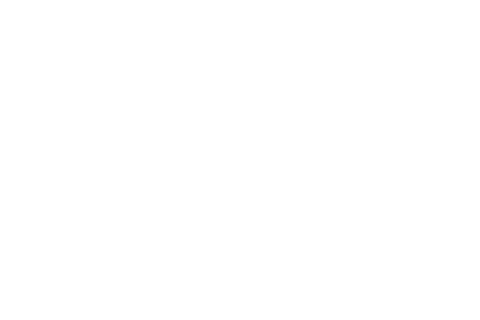

<IPython.core.display.Javascript object>


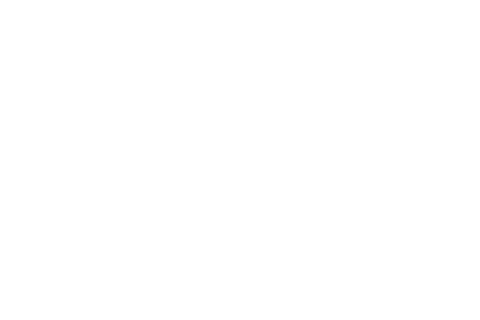

In [64]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.imshow(vx[:,:,113],interpolation='nearest')

<IPython.core.display.Javascript object>


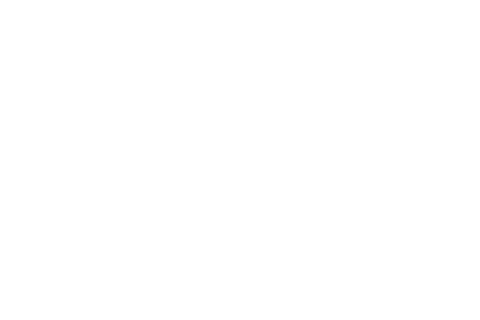

<IPython.core.display.Javascript object>


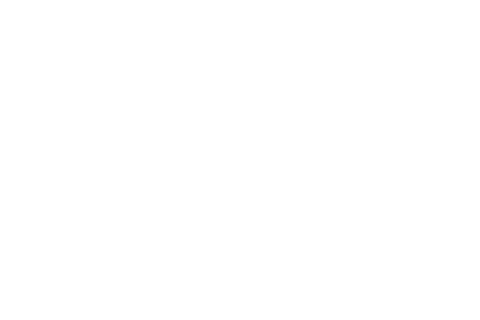

In [65]:
%matplotlib notebook 
import matplotlib.pyplot as plt

#fig = plt.figure(dpi=223)

plt.grid()
plt.plot(np.arange(0,nz),vx[:,ny/2,3],'o-')


In [66]:
print "Re from LBM:",np.nanmax(vx[:,:,:])*(ny-2)/visc,"u_max=",np.nanmax(vx[:,:,:]),vx.shape

Re from LBM: 140.466554055 u_max= 0.0625076165543 (56, 56, 280)


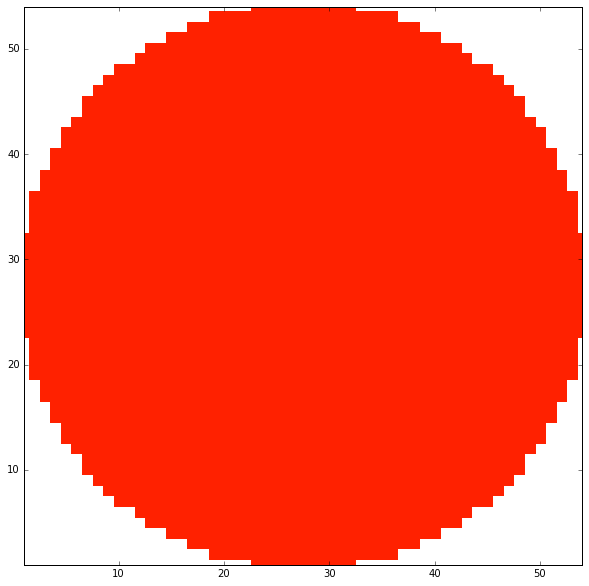

In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, interactive, fixed
from ipywidgets import widgets
nz,ny,nx = vx.shape
Y,X = np.mgrid[0:ny,0:nx]

@interact(zi=widgets.IntSlider(min=0,max=(nx-1)),\
          figsize=widgets.IntSlider(min=0,max=20,value=10) )
         
def g(zi,figsize):    
    plt.figure(figsize=(figsize,float(nz)/ny*figsize))
    plt.xlim(1,ny-2)
    plt.ylim(1,nz-2) 
    #plt.imshow(vx[:,:,zi],origin='top',vmin=0.0,vmax=0.05,interpolation='nearest')
    plt.imshow(rho[:,:,zi],origin='top',vmin=np.nanmin(rho),vmax=np.nanmax(rho),interpolation='nearest')
    plt.show() 


In [68]:
np.nanmax(rho),np.nanmin(rho),np.nanmax(rho)

(1.0030949917891026, 0.99687961044794893, 1.0030949917891026)

In [69]:
ctrl.master.sim.grid.cssq.n()

0.333333333333333

In [70]:
mu = ctrl.master.runner.config.visc
print mu,visc


0.02403 0.02403


In [71]:
dx=100
x0 = 123
cs2 =1/3.
print cs2/(4*mu)*(rho[nz/2,ny/2,150]-rho[nz/2,ny/2,150+dx])/dx* ((ny-2)/2)**2
print np.nanmax( vx[nz/2,ny/2,150])

0.0539109423994
0.0540792092705


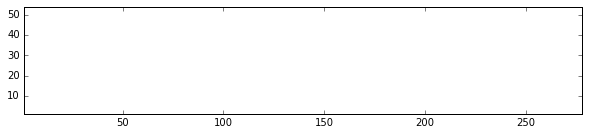

In [72]:
nz,ny,nx = vx.shape

@interact(zi=widgets.IntSlider(min=0,max=(ny-1)),\
          figsize=widgets.IntSlider(min=0,max=20,value=10)   )
def g(zi,figsize):    
    plt.figure(figsize=(figsize,float(nx)/ny*figsize))
    plt.xlim(1,nx-2)
    plt.ylim(1,ny-2) 
    plt.imshow(vx[zi,:,:],origin='top',vmin=0.005,vmax=0.07)
    plt.show() 


/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


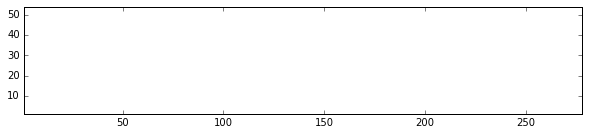

In [73]:
nz,ny,nx = vx.shape

@interact(zi=widgets.IntSlider(min=0,max=(ny-1)),\
          figsize=widgets.IntSlider(min=0,max=20,value=10)   )
def g(zi,figsize):    
    plt.figure(figsize=(figsize,float(nx)/ny*figsize))
    plt.xlim(1,nx-2)
    plt.ylim(1,ny-2) 
    plt.imshow(rho[zi,:,:],origin='top')
    plt.show() 


In [74]:
l0 = 5e-3
Dx = l0/(ny-2)

In [75]:
vx[nz/4,:,1]

array([        nan,         nan,         nan,         nan,         nan,
        0.00124161,  0.00341419,  0.00584586,  0.00856181,  0.011358  ,
        0.0141357 ,  0.01681741,  0.01942888,  0.02194986,  0.024385  ,
        0.02671051,  0.02891264,  0.03097693,  0.03289591,  0.0346552 ,
        0.03624464,  0.03765509,  0.03887968,  0.03991045,  0.04074155,
        0.04136899,  0.04178927,  0.04199959,  0.04199959,  0.04178927,
        0.04136899,  0.04074155,  0.03991045,  0.03887968,  0.03765509,
        0.03624464,  0.0346552 ,  0.03289591,  0.03097693,  0.02891264,
        0.02671051,  0.024385  ,  0.02194986,  0.01942888,  0.01681741,
        0.0141357 ,  0.011358  ,  0.00856181,  0.00584586,  0.00341419,
        0.00124161,         nan,         nan,         nan,         nan,
               nan])

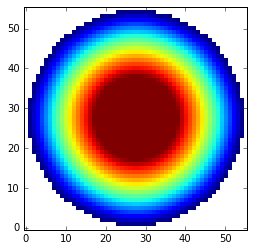

In [76]:
plt.imshow(vx[:,:,0],origin='top',vmin=0.0,vmax=0.05,interpolation='nearest')


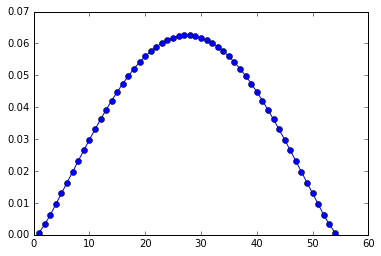

In [77]:
nz,ny,nx = vx.shape

@interact(zi=widgets.IntSlider(min=0,max=(nx-1)),\
          figsize=widgets.IntSlider(min=0,max=20,value=10)   )
def g(zi,figsize):    
    #plt.figure(figsize=(figsize,float(nx)/ny*figsize))
    
    plt.ylim(0,0.07) 
    plt.plot(vx[nz/2,:,zi],'o-')
    plt.show() 


(196, 243)
u_max - formula:    0.0540774481062
u_max - simulation: 0.0538004909229


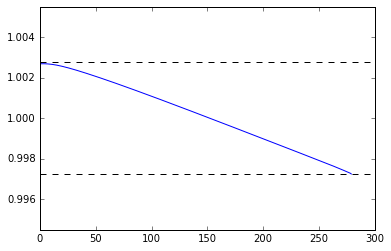

In [55]:
%matplotlib inline 
import matplotlib.pyplot as plt
nz,ny,nx = vx.shape

@interact(zi=widgets.IntSlider(min=0,max=(ny-1),value=ny/2), window=widgets.IntRangeSlider(min=0,max=nx-1)    )
def g(zi,window):
    print window
    a,b = window
    dx = b-a
    x0 = a
    assert(dx+x0<nx)
    cs2 =1/3.
    print "u_max - formula:   ",cs2/(4*mu)*(rho[zi,ny/2,x0]-rho[zi,ny/2,x0+dx])/dx* ((ny-2)/2)**2
    print "u_max - simulation:",np.nanmax( vx[nz/2,ny/2,x0])
    
    plt.ylim(1-delta_rho_lu,1+delta_rho_lu) 
    plt.plot(rho[zi,ny/2,:],'-')
    plt.axhline(y=1+delta_rho_lu/2,color='k',linestyle='--')
    plt.axhline(y=1-delta_rho_lu/2,color='k',linestyle='--')
    plt.show() 


In [31]:
nx

280

In [22]:
visc = 0.01
print "Re:",62*0.02/visc

Re: 124.0


In [35]:
widgets.IntRangeSlider

In [43]:
w = 
w

In [41]:
w.value

(23, 81)

In [185]:
%%sh
rm data/forcedpipe*npz 
export PYTHONPATH=$PWD/sailfish/
python sailfish/examples/poiseuille_3d.py --max_iters=60000 --every=1000 --from=0 \
   --output=data/forcedpipe --output_format=npy --lat_nx=356 \
   --drive=force   --visc=0.01


[   759  INFO Master/GPU3] Machine master starting with PID 126300 at 2016-07-08 14:17:17 UTC
[   760  INFO Master/GPU3] Simulation started with: sailfish/examples/poiseuille_3d.py --max_iters=60000 --every=1000 --from=0 --output=data/forcedpipe --output_format=npy --lat_nx=356 --drive=force --visc=0.01
[   769  INFO Master/GPU3] Sailfish version: dcc3d33d3c6fe420f78ff1af13471774ef283c74
[   769  INFO Master/GPU3] Handling subdomains: [0]
[   769  INFO Master/GPU3] Subdomain -> GPU map: {0: 0}
[   770  INFO Master/GPU3] Selected backend: cuda
[   943  INFO Subdomain/0] Initializing subdomain.
[   944  INFO Subdomain/0] Required memory: 
[   944  INFO Subdomain/0] . distributions: 165 MiB
[   944  INFO Subdomain/0] . fields: 25 MiB
[  6153  INFO Subdomain/0] Starting simulation.
[  8543  INFO Subdomain/0] iteration:2000  speed:807.27 MLUPS
[  9886  INFO Subdomain/0] iteration:3000  speed:792.64 MLUPS
[ 11234  INFO Subdomain/0] iteration:4000  speed:798.36 MLUPS
[ 12610  INFO Subdomain/0

In [ ]:
data=np.load('data/forcedpipe.0.10000.npz')
vx,vy,vz  = data['v']
rho = data['rho']
nz,ny,nx = vx.shape
np.nanmax(vx),0.02*2/3.

In [ ]:
import glob
for fn in sorted(glob.glob("data/forcedpipe.0.*.npz")):
    data=np.load(fn)
    vx,vy,vz  = data['v']
    rho = data['rho']
    nz,ny,nx = vx.shape
    print np.nanmax(vx),0.02*2/3.

In [25]:
data=np.load('data/forcedpipe.0.10000.npz')
vx,vy,vz  = data['v']
rho = data['rho']
nz,ny,nx = vx.shape
np.nanmax(vx),0.02*2/3.

(0.0074545629, 0.013333333333333334)

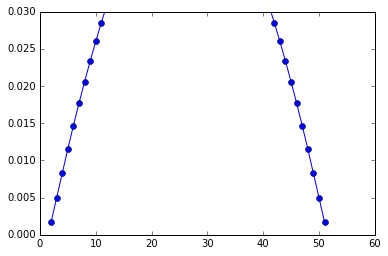

In [145]:
nz,ny,nx = vx.shape

@interact(zi=widgets.IntSlider(min=0,max=(nx-1)),\
            )
def g(zi):    
    plt.ylim(0,0.03) 
    plt.plot(vx[nz/3,:,zi],'o-')
    plt.show() 

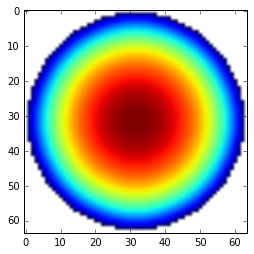

In [27]:
plt.imshow(vx[:,:,2])

In [28]:
np.nanmax(vx),0.02*2/3.

(0.0074545629, 0.013333333333333334)

In [29]:
rho[32,12,:]

array([ 1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00028825,
        1.00028825,  1.00028825,  1.00028825,  1.00028825,  1.00

In [144]:
0.013281101/0.02

0.66405505